In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dev_df = pd.read_csv('../data/WikiQA-dev.tsv', sep="\t")
dev_df.head(20)

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-0,Cross section of sclerenchyma fibers in plant ...,0
1,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-1,Microscopic view of a histologic specimen of h...,0
2,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-2,"In Biology , Tissue is a cellular organization...",0
3,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-3,A tissue is an ensemble of similar cells from ...,0
4,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-4,Organs are then formed by the functional group...,0
5,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-5,"The study of tissue is known as histology or, ...",0
6,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-6,The classical tools for studying tissues are t...,0
7,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-7,"In the last couple of decades, developments in...",0
8,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-8,"With these tools, the classical appearances of...",0
9,Q11,"how big is bmc software in houston, tx",D11,BMC Software,D11-0,"BMC Software, Inc. is an American company spec...",0


In [65]:
text_df = pd.read_csv('../data/WikiQA.tsv', sep="\t")
text_df['DocumentTitle']

0        African immigration to the United States
1        African immigration to the United States
2        African immigration to the United States
3        African immigration to the United States
4        African immigration to the United States
5        African immigration to the United States
6                                    Glacier cave
7                                    Glacier cave
8                                    Glacier cave
9                                    Glacier cave
10                                   Glacier cave
11                                Circular motion
12                                Circular motion
13                                Circular motion
14                                Circular motion
15                                Circular motion
16                                Circular motion
17                                Circular motion
18                                         Prison
19                                         Prison


In [66]:
print("number of questions: {}".format(len(text_df['Question'].unique())))
print("number of Document titles: {}".format(len(text_df['DocumentTitle'].unique())))

number of questions: 3044
number of Document titles: 2809


In [68]:
africa_df = text_df[text_df['DocumentTitle'] == 'African immigration to the United States'].reset_index()
africa_df

,index,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,0,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-0,African immigration to the United States refer...,0
1,1,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-1,The term African in the scope of this article ...,0
2,2,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-2,From the Immigration and Nationality Act of 19...,0
3,3,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-3,African immigrants in the United States come f...,0
4,4,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-4,"They include people from different national, l...",0
5,5,Q0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,D0,African immigration to the United States,D0-5,"As such, African immigrants are to be distingu...",1


In [5]:
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2733 entries, 0 to 2732
Data columns (total 7 columns):
QuestionID       2733 non-null object
Question         2733 non-null object
DocumentID       2733 non-null object
DocumentTitle    2733 non-null object
SentenceID       2733 non-null object
Sentence         2733 non-null object
Label            2733 non-null int64
dtypes: int64(1), object(6)
memory usage: 149.5+ KB


In [6]:
dev_df['DocumentTitle'].unique()

array(['Tissue (biology)', 'BMC Software', 'I Love Lucy',
       'Pitbull (entertainer)', 'List of youngest birth mothers',
       'Pornographic film actor', 'National debt of the United States',
       'Athenian democracy', 'Owl', 'What Do You Want From Me',
       'Olympic Games', 'Pancreatic cancer', 'Biblical judges',
       'Syd Barrett', 'Oklahoma City bombing', 'Precalculus',
       'Battery (electricity)', 'List of Xbox 360 games',
       'Northern California', 'Multiple sclerosis', 'Jupiter',
       'Little League Baseball', 'Clarence Clemons', 'Teleconverter',
       'Cell Membrane', 'Late Heavy Bombardment', 'Rainbow',
       'Federal Reserve System', 'Foundation (cosmetics)',
       'Abraham Lincoln', 'Mark Cuban', 'Lockheed Martin F-22 Raptor',
       'Ocean', 'Toledo Zoo', 'Film budgeting',
       'Supreme Court of the United States', 'Diagnosis-related group',
       'Pacific Ocean', 'Plus-minus sign', 'Judgment as a matter of law',
       'Christianity', 'Formula One ca

In [7]:
dev_df['Question'].unique()

array(['How are epithelial tissues joined together?',
       'how big is bmc software in houston, tx',
       'how long was i love lucy on the air',
       'how did armando christian perez become famous',
       'how old is youngest mother in the world',
       'how much is an adult film actor paid',
       'How much is US National Debt limit?',
       'how did athenians make money', 'what bird family is the owl',
       'what do you want from me quotes',
       'how old do you have to be to get in the olympics',
       'how does one get pancreatic cancer', 'How Many Judges of Israel',
       'what happened to pink floyd',
       'how many people were killed in the oklahoma city bombing',
       'how does the book flatlands related to pre calc',
       'how many electrons can a 1.5 v battery with a capacity of 2.2 AH hold at full charge',
       'how many xbox 360 games are there',
       'how far inland os tehachapi california',
       'how many types of sclerosis',
       'how many p

In [41]:
print("number of questions: {}".format(len(dev_df['Question'].unique())))
print("number of Document titles: {}".format(len(dev_df['DocumentTitle'].unique())))

number of questions: 296
number of Document titles: 293


In [44]:
print("number of Answers: {}".format(len(dev_df.groupby('DocumentTitle')['Sentence'])))

number of Answers: 293


In [22]:
tissue_df = dev_df[dev_df['DocumentTitle'] == 'Tissue (biology)'].reset_index()

In [23]:
tissue_df

,index,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,0,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-0,Cross section of sclerenchyma fibers in plant ...,0
1,1,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-1,Microscopic view of a histologic specimen of h...,0
2,2,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-2,"In Biology , Tissue is a cellular organization...",0
3,3,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-3,A tissue is an ensemble of similar cells from ...,0
4,4,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-4,Organs are then formed by the functional group...,0
5,5,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-5,"The study of tissue is known as histology or, ...",0
6,6,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-6,The classical tools for studying tissues are t...,0
7,7,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-7,"In the last couple of decades, developments in...",0
8,8,Q8,How are epithelial tissues joined together?,D8,Tissue (biology),D8-8,"With these tools, the classical appearances of...",0


In [24]:
pharm_df = dev_df[dev_df['DocumentTitle'] == 'Pharmaceutical industry'].reset_index()

In [25]:
pharm_df

,index,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,910,Q927,how many consumers of pharmaceuticals,D895,Pharmaceutical industry,D895-0,"The pharmaceutical industry develops, produces...",0
1,911,Q927,how many consumers of pharmaceuticals,D895,Pharmaceutical industry,D895-1,Pharmaceutical companies are allowed to deal i...,0
2,912,Q927,how many consumers of pharmaceuticals,D895,Pharmaceutical industry,D895-2,They are subject to a variety of laws and regu...,0
3,913,Q927,how many consumers of pharmaceuticals,D895,Pharmaceutical industry,D895-3,The word pharmaceutical comes from the Greek w...,0
4,914,Q927,how many consumers of pharmaceuticals,D895,Pharmaceutical industry,D895-4,The modern transliteration of Pharmakeia is Ph...,0


In [26]:
aurora_df = dev_df[dev_df['DocumentTitle'] == 'Aurora, Colorado'].reset_index()

In [27]:
aurora_df

,index,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,505,Q489,"What county is Aurora, IN",D482,"Aurora, Colorado",D482-0,"The City of Aurora (, ) is a Home Rule Municip...",0
1,506,Q489,"What county is Aurora, IN",D482,"Aurora, Colorado",D482-1,Aurora is one of the principal cities of the D...,0
2,507,Q489,"What county is Aurora, IN",D482,"Aurora, Colorado",D482-2,"The city's population was 325,078 in the 2010 ...",0
3,508,Q489,"What county is Aurora, IN",D482,"Aurora, Colorado",D482-3,Denver and Aurora are the principal cities of ...,0
4,509,Q489,"What county is Aurora, IN",D482,"Aurora, Colorado",D482-4,"However, Denver and Aurora combined make up le...",0
5,510,Q489,"What county is Aurora, IN",D482,"Aurora, Colorado",D482-5,The estimated population of Metropolitan Denve...,0


In [28]:
ill_df = dev_df[dev_df['DocumentTitle'] == 'I Love Lucy'].reset_index()
ill_df

,index,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,14,Q48,how long was i love lucy on the air,D48,I Love Lucy,D48-0,I Love Lucy is an American television sitcom s...,0
1,15,Q48,how long was i love lucy on the air,D48,I Love Lucy,D48-1,The black-and-white series originally ran from...,1
2,16,Q48,how long was i love lucy on the air,D48,I Love Lucy,D48-2,"After the series ended in 1957, however, a mod...",0
3,17,Q48,how long was i love lucy on the air,D48,I Love Lucy,D48-3,I Love Lucy was the most watched show in the U...,0
4,18,Q48,how long was i love lucy on the air,D48,I Love Lucy,D48-4,I Love Lucy is still syndicated in dozens of l...,0
5,19,Q48,how long was i love lucy on the air,D48,I Love Lucy,D48-5,The show was the first scripted television pro...,0
6,20,Q48,how long was i love lucy on the air,D48,I Love Lucy,D48-6,"In 2002, it ranked second on TV Guide's list o...",0
7,21,Q48,how long was i love lucy on the air,D48,I Love Lucy,D48-7,"In 2007, it was listed as one of Time magazine...",0
8,22,Q48,how long was i love lucy on the air,D48,I Love Lucy,D48-8,"I Love Lucy remains popular, with an American ...",0


In [29]:
ill_df['Sentence'][0]

'I Love Lucy is an American television sitcom starring Lucille Ball , Desi Arnaz , Vivian Vance , and William Frawley .'

In [30]:
cancer_df = dev_df[dev_df['DocumentTitle'] == 'Pancreatic cancer'].reset_index()
cancer_df

,index,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,130,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-0,Pancreatic cancer is a malignant neoplasm orig...,0
1,131,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-1,"The most common type of pancreatic cancer , ac...",0
2,132,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-2,"A minority arise from islet cells , and are cl...",0
3,133,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-3,The signs and symptoms that eventually lead to...,0
4,134,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-4,Pancreatic cancer is the fourth most common ca...,0
5,135,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-5,Pancreatic cancer has an extremely poor progno...,0
6,136,Q138,how does one get pancreatic cancer,D138,Pancreatic cancer,D138-6,Others have slower progression and may live a ...,0


In [31]:
steinbeck_df = dev_df[dev_df['DocumentTitle'] == 'John Steinbeck'].reset_index()
steinbeck_df

,index,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,541,Q509,what kind of literature did john steinbeck wri...,D502,John Steinbeck,D502-0,"John Ernst Steinbeck, Jr. (February 27, 1902 –...",0
1,542,Q509,what kind of literature did john steinbeck wri...,D502,John Steinbeck,D502-1,He is widely known for the Pulitzer Prize -win...,0
2,543,Q509,what kind of literature did john steinbeck wri...,D502,John Steinbeck,D502-2,"As the author of twenty-seven books, including...",1


In [32]:
jupiter_df = dev_df[dev_df['DocumentTitle'] == 'Jupiter'].reset_index()
jupiter_df

,index,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,249,Q253,how many planets is jupiter away from the sun?,D253,Jupiter,D253-0,Jupiter is the fifth planet from the Sun and t...,1
1,250,Q253,how many planets is jupiter away from the sun?,D253,Jupiter,D253-1,It is a gas giant with mass one-thousandth tha...,0
2,251,Q253,how many planets is jupiter away from the sun?,D253,Jupiter,D253-2,Jupiter is classified as a gas giant along wit...,0
3,252,Q253,how many planets is jupiter away from the sun?,D253,Jupiter,D253-3,"Together, these four planets are sometimes ref...",0
4,253,Q253,how many planets is jupiter away from the sun?,D253,Jupiter,D253-4,The planet was known by astronomers of ancient...,0
5,254,Q253,how many planets is jupiter away from the sun?,D253,Jupiter,D253-5,The Romans named the planet after the Roman go...,0
6,255,Q253,how many planets is jupiter away from the sun?,D253,Jupiter,D253-6,"When viewed from Earth , Jupiter can reach an ...",0
7,256,Q253,how many planets is jupiter away from the sun?,D253,Jupiter,D253-7,( Mars can briefly match Jupiter's brightness ...,0
8,257,Q253,how many planets is jupiter away from the sun?,D253,Jupiter,D253-8,Jupiter is primarily composed of hydrogen with...,0
9,258,Q253,how many planets is jupiter away from the sun?,D253,Jupiter,D253-9,It may also have a rocky core of heavier eleme...,0


In [33]:
brain_df = dev_df[dev_df['DocumentTitle'] == 'List of regions in the human brain'].reset_index()
brain_df

,index,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,834,Q828,how many regions do the human brain have?,D802,List of regions in the human brain,D802-0,Anatomical regions of the brain are listed ver...,0
1,835,Q828,how many regions do the human brain have?,D802,List of regions in the human brain,D802-1,"Functional , connective , and developmental re...",0


In [35]:
jefferson_df = dev_df[dev_df['DocumentTitle'] == 'Thomas Jefferson'].reset_index()
jefferson_df

,index,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,1182,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-0,"Thomas Jefferson (April 13, 1743 (April 2, 174...",0
1,1183,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-1,"At the beginning of the American Revolution , ...",0
2,1184,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-2,"Just after the war ended, from mid-1784 Jeffer...",0
3,1185,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-3,"In May 1785, he became the United States Minis...",0
4,1186,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-4,Jefferson was the first United States Secretar...,0
5,1187,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-5,With his close friend James Madison he organiz...,0
6,1188,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-6,"Elected Vice President in 1796, when he came i...",0
7,1189,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-7,Elected president in what Jefferson called the...,0
8,1190,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-8,His second term was beset with troubles at hom...,0
9,1191,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-9,With escalating trouble with Britain who was c...,0


In [36]:
washington_df = dev_df[dev_df['DocumentTitle'] == 'George Washington'].reset_index()
washington_df

,index,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,1567,Q1677,when did george washington died?,D1593,George Washington,D1593-0,"George Washington ( – , 1799) was the first Pr...",1
1,1568,Q1677,when did george washington died?,D1593,George Washington,D1593-1,He presided over the convention that drafted t...,0
2,1569,Q1677,when did george washington died?,D1593,George Washington,D1593-2,Washington was elected President as the unanim...,0
3,1570,Q1677,when did george washington died?,D1593,George Washington,D1593-3,"He oversaw the creation of a strong, well-fina...",0
4,1571,Q1677,when did george washington died?,D1593,George Washington,D1593-4,His leadership style established many forms an...,0
5,1572,Q1677,when did george washington died?,D1593,George Washington,D1593-5,"Further, the peaceful transition from his pres...",0
6,1573,Q1677,when did george washington died?,D1593,George Washington,D1593-6,"Washington was hailed as "" father of his count...",0
7,1574,Q1677,when did george washington died?,D1593,George Washington,D1593-7,Washington was born into the provincial gentry...,0
8,1575,Q1677,when did george washington died?,D1593,George Washington,D1593-8,After both his father and older brother died w...,0
9,1576,Q1677,when did george washington died?,D1593,George Washington,D1593-9,Washington quickly became a senior officer in ...,0


In [37]:
presidents_df = pd.concat([jefferson_df, washington_df])

In [38]:
presidents_df

,index,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,1182,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-0,"Thomas Jefferson (April 13, 1743 (April 2, 174...",0
1,1183,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-1,"At the beginning of the American Revolution , ...",0
2,1184,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-2,"Just after the war ended, from mid-1784 Jeffer...",0
3,1185,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-3,"In May 1785, he became the United States Minis...",0
4,1186,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-4,Jefferson was the first United States Secretar...,0
5,1187,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-5,With his close friend James Madison he organiz...,0
6,1188,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-6,"Elected Vice President in 1796, when he came i...",0
7,1189,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-7,Elected president in what Jefferson called the...,0
8,1190,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-8,His second term was beset with troubles at hom...,0
9,1191,Q1302,what money is jefferson on,D1246,Thomas Jefferson,D1246-9,With escalating trouble with Britain who was c...,0


In [103]:
# Count the number of questions for each category
grouped_df = text_df.groupby(['DocumentTitle', 'Question']).count()
qtypes = text_df.drop(columns=['QuestionID', 'DocumentID', 'SentenceID', 'Label'])
qtypes

,Question,DocumentTitle,Sentence
0,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,African immigration to the United States,African immigration to the United States refer...
1,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,African immigration to the United States,The term African in the scope of this article ...
2,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,African immigration to the United States,From the Immigration and Nationality Act of 19...
3,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,African immigration to the United States,African immigrants in the United States come f...
4,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,African immigration to the United States,"They include people from different national, l..."
5,HOW AFRICAN AMERICANS WERE IMMIGRATED TO THE US,African immigration to the United States,"As such, African immigrants are to be distingu..."
6,how are glacier caves formed?,Glacier cave,A partly submerged glacier cave on Perito More...
7,how are glacier caves formed?,Glacier cave,The ice facade is approximately 60 m high
8,how are glacier caves formed?,Glacier cave,Ice formations in the Titlis glacier cave
9,how are glacier caves formed?,Glacier cave,A glacier cave is a cave formed within the ice...


In [114]:
series = []
# for i in qtypes['DocumentTitle'].unique():
title_counts = qtypes.groupby('DocumentTitle').count()

,Question,Sentence
DocumentTitle,,
...Baby One More Time,18,18
.17 HMR,3,3
.eu,5,5
112th United States Congress,9,9
12-hour clock,3,3
1877,1,1
18th century,22,22
1907,1,1
1967 NBA Finals,4,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe354000550>,
      dtype=object)

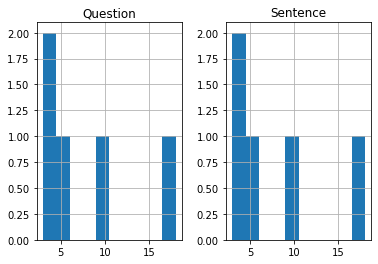

In [111]:
title_counts.head(5).hist()

Code below is taken from this Kaggle project:
https://www.kaggle.com/spurryag/beginner-attempt-at-nlp-workflow

In [113]:
#import the wordcloud package
from wordcloud import WordCloud, STOPWORDS

#Define the word cloud function with a max of 200 words
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    #define additional stop words that are not contained in the dictionary
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)
    #Generate the word cloud
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    #set the plot parameters
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

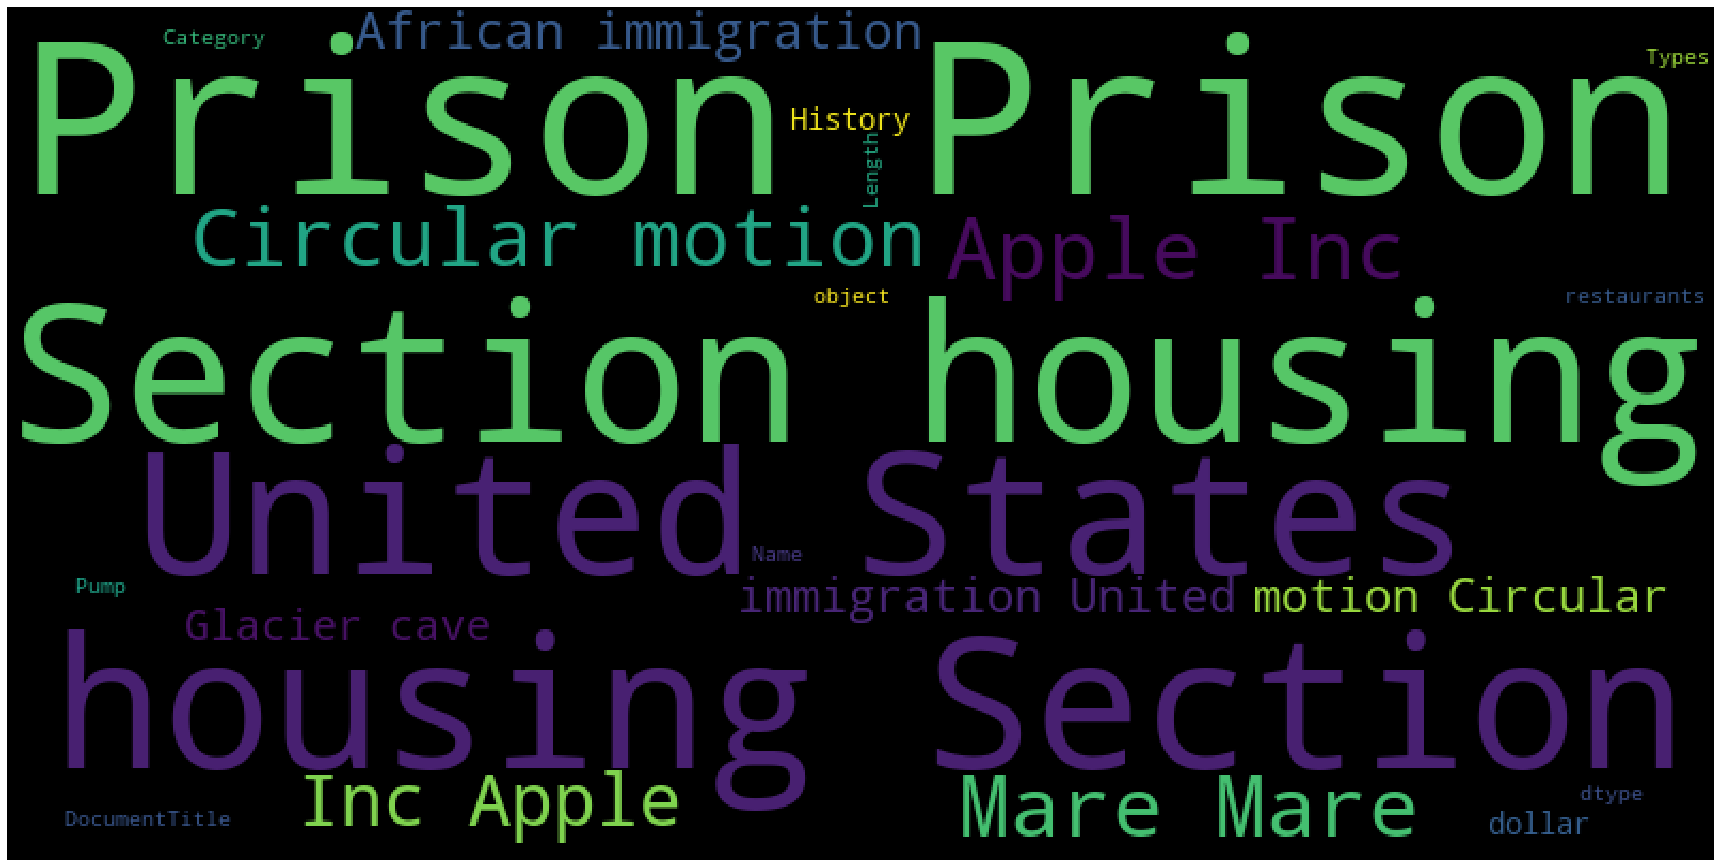

In [115]:
plot_wordcloud(text_df['DocumentTitle'])

In [116]:
text_df['DocumentTitle']

0        African immigration to the United States
1        African immigration to the United States
2        African immigration to the United States
3        African immigration to the United States
4        African immigration to the United States
5        African immigration to the United States
6                                    Glacier cave
7                                    Glacier cave
8                                    Glacier cave
9                                    Glacier cave
10                                   Glacier cave
11                                Circular motion
12                                Circular motion
13                                Circular motion
14                                Circular motion
15                                Circular motion
16                                Circular motion
17                                Circular motion
18                                         Prison
19                                         Prison
